In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import multiprocessing

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
data=pd.read_csv("/content/drive/MyDrive/Data/all_features_from_BonnUniversityData.csv")

In [66]:
data

,Unnamed: 0,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_2,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_3,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,...,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,0,173695.0,25.377304,173695.0,0.471771,34.0,138.0,-13.0,39.0,0.830105,5.614204,24.836213,0.111261,59.933722,42.267570,0.490933,16.066097,22.784589,10.488001,26.984755,1.529738,0.966991,129.268650,3.258370,0.508850,5.990349,19.134862,0.213319,1.367547,4.544641,2.718637,3.981568,4.090144,98.851162,0.722173,0.264416,0.575909,0.060664,1.047111,0.431487,...,1.753108e+05,816.818003,0.126469,0.068692,0.972429,2.448389,4.138888,5.834225,7.408211,8.798470,10.005954,11.571289,30.384073,43.311963,51.772016,58.684009,65.065302,70.565564,74.919285,78.429318,2.103424,11.570597,30.383995,43.301046,51.714089,58.537872,64.803205,70.175617,74.400848,77.788424,133.878726,923.187182,1874.980555,2674.347003,3426.682513,4199.455379,4924.617274,5535.486220,6051.038864,22.0
1,1,321352.0,34.637097,321352.0,0.591311,34.0,138.0,-35.0,53.0,0.867992,0.736201,397.349087,303.504011,105.204427,107.244829,35.411190,1.139690,2.965988,2.058869,2.622974,2.769912,4.026676,131.185457,0.111071,0.623779,2.748486,2.368429,4.511445,3.138348,8.266056,0.968859,4.602413,2.997923,43.998878,2.809499,1.484607,0.138251,4.880736,0.869797,0.371181,...,3.243413e+05,1789.773130,0.046456,0.337195,0.647063,0.947987,1.472874,2.327408,3.433875,4.675229,5.997319,12.319213,38.013340,68.923873,88.683719,92.145502,86.350071,80.244169,78.125088,79.525905,2.109975,12.319125,38.011844,68.920835,88.678653,92.133729,86.318700,80.170663,77.985073,79.299443,151.760844,1444.900302,4750.081563,7863.903416,8488.624094,7450.917960,6427.335187,6081.671622,6288.401704,24.0
2,2,178011.0,24.853111,178011.0,0.483686,34.0,138.0,-18.0,32.0,0.848998,2.599723,17.441111,43.946714,9.247282,68.450383,42.731806,25.522930,26.288308,0.351556,3.788646,48.939000,29.268715,183.398229,10.871617,12.690794,3.322921,9.486831,3.000537,8.659045,23.982698,3.068943,1.740402,4.089811,104.211897,3.440336,0.773652,3.166809,1.149870,0.154326,0.144605,...,1.796669e+05,960.544689,0.058804,0.152178,0.108065,0.006257,0.193206,0.480404,0.844744,1.229305,1.571868,14.827338,36.958776,48.051466,54.357964,58.744089,62.876758,66.881140,70.334471,73.371464,2.130605,14.82

In [67]:
del data['Unnamed: 0']

In [68]:
data

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_2,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_3,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,...,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,173695.0,25.377304,173695.0,0.471771,34.0,138.0,-13.0,39.0,0.830105,5.614204,24.836213,0.111261,59.933722,42.267570,0.490933,16.066097,22.784589,10.488001,26.984755,1.529738,0.966991,129.268650,3.258370,0.508850,5.990349,19.134862,0.213319,1.367547,4.544641,2.718637,3.981568,4.090144,98.851162,0.722173,0.264416,0.575909,0.060664,1.047111,0.431487,0.320135,...,1.753108e+05,816.818003,0.126469,0.068692,0.972429,2.448389,4.138888,5.834225,7.408211,8.798470,10.005954,11.571289,30.384073,43.311963,51.772016,58.684009,65.065302,70.565564,74.919285,78.429318,2.103424,11.570597,30.383995,43.301046,51.714089,58.537872,64.803205,70.175617,74.400848,77.788424,133.878726,923.187182,1874.980555,2674.347003,3426.682513,4199.455379,4924.617274,5535.486220,6051.038864,22.0
1,321352.0,34.637097,321352.0,0.591311,34.0,138.0,-35.0,53.0,0.867992,0.736201,397.349087,303.504011,105.204427,107.244829,35.411190,1.139690,2.965988,2.058869,2.622974,2.769912,4.026676,131.185457,0.111071,0.623779,2.748486,2.368429,4.511445,3.138348,8.266056,0.968859,4.602413,2.997923,43.998878,2.809499,1.484607,0.138251,4.880736,0.869797,0.371181,0.419930,...,3.243413e+05,1789.773130,0.046456,0.337195,0.647063,0.947987,1.472874,2.327408,3.433875,4.675229,5.997319,12.319213,38.013340,68.923873,88.683719,92.145502,86.350071,80.244169,78.125088,79.525905,2.109975,12.319125,38.011844,68.920835,88.678653,92.133729,86.318700,80.170663,77.985073,79.299443,151.760844,1444.900302,4750.081563,7863.903416,8488.624094,7450.917960,6427.335187,6081.671622,6288.401704,24.0
2,178011.0,24.853111,178011.0,0.483686,34.0,138.0,-18.0,32.0,0.848998,2.599723,17.441111,43.946714,9.247282,68.450383,42.731806,25.522930,26.288308,0.351556,3.788646,48.939000,29.268715,183.398229,10.871617,12.690794,3.322921,9.486831,3.000537,8.659045,23.982698,3.068943,1.740402,4.089811,104.211897,3.440336,0.773652,3.166809,1.149870,0.154326,0.144605,0.460740,...,1.796669e+05,960.544689,0.058804,0.152178,0.108065,0.006257,0.193206,0.480404,0.844744,1.229305,1.571868,14.827338,36.958776,48.051466,54.357964,58.744089,62.876758,66.88114

Creating target vector:

In [69]:
target=[]
for i in range(0,2300):
    target.append("A")
for i in range(0,2300):
    target.append("B")
for i in range(0,2300):
    target.append("C")
for i in range(0,2300):
    target.append("D")
for i in range(0,2300):
    target.append("E")


In [70]:
target=pd.DataFrame(target,columns=['y'])

In [71]:
target

,y
0,A
1,A
2,A
3,A
4,A
...,...
11495,E
11496,E
11497,E
11498,E


In [72]:
data['target']=target

In [73]:
data

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_2,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_3,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,...,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,target
0,173695.0,25.377304,173695.0,0.471771,34.0,138.0,-13.0,39.0,0.830105,5.614204,24.836213,0.111261,59.933722,42.267570,0.490933,16.066097,22.784589,10.488001,26.984755,1.529738,0.966991,129.268650,3.258370,0.508850,5.990349,19.134862,0.213319,1.367547,4.544641,2.718637,3.981568,4.090144,98.851162,0.722173,0.264416,0.575909,0.060664,1.047111,0.431487,0.320135,...,816.818003,0.126469,0.068692,0.972429,2.448389,4.138888,5.834225,7.408211,8.798470,10.005954,11.571289,30.384073,43.311963,51.772016,58.684009,65.065302,70.565564,74.919285,78.429318,2.103424,11.570597,30.383995,43.301046,51.714089,58.537872,64.803205,70.175617,74.400848,77.788424,133.878726,923.187182,1874.980555,2674.347003,3426.682513,4199.455379,4924.617274,5535.486220,6051.038864,22.0,A
1,321352.0,34.637097,321352.0,0.591311,34.0,138.0,-35.0,53.0,0.867992,0.736201,397.349087,303.504011,105.204427,107.244829,35.411190,1.139690,2.965988,2.058869,2.622974,2.769912,4.026676,131.185457,0.111071,0.623779,2.748486,2.368429,4.511445,3.138348,8.266056,0.968859,4.602413,2.997923,43.998878,2.809499,1.484607,0.138251,4.880736,0.869797,0.371181,0.419930,...,1789.773130,0.046456,0.337195,0.647063,0.947987,1.472874,2.327408,3.433875,4.675229,5.997319,12.319213,38.013340,68.923873,88.683719,92.145502,86.350071,80.244169,78.125088,79.525905,2.109975,12.319125,38.011844,68.920835,88.678653,92.133729,86.318700,80.170663,77.985073,79.299443,151.760844,1444.900302,4750.081563,7863.903416,8488.624094,7450.917960,6427.335187,6081.671622,6288.401704,24.0,A
2,178011.0,24.853111,178011.0,0.483686,34.0,138.0,-18.0,32.0,0.848998,2.599723,17.441111,43.946714,9.247282,68.450383,42.731806,25.522930,26.288308,0.351556,3.788646,48.939000,29.268715,183.398229,10.871617,12.690794,3.322921,9.486831,3.000537,8.659045,23.982698,3.068943,1.740402,4.089811,104.211897,3.440336,0.773652,3.166809,1.149870,0.154326,0.144605,0.460740,...,960.544689,0.058804,0.152178,0.108065,0.006257,0.193206,0.480404,0.844744,1.229305,1.571868,14.827338,36.958776,48.051466,54.357964,58.744089,62.876758,66.881140,70.334471,73.371464,2.130605,14.827222,36

In [74]:
data = data[data.target != "A"]

In [75]:
data = data[data.target != "B"]

In [76]:
data

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_2,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_3,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,...,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,target
4600,463685.0,43.142281,463685.0,0.549382,34.0,138.0,-65.0,26.0,0.877683,32.238888,139.169907,43.487164,24.608102,17.607105,5.816364,14.972710,3.721922,2.714698,1.622339,0.405003,2.304407,863.763332,4.228643,0.495853,0.183999,1.073217,0.393668,0.632264,0.719593,0.717062,0.019801,0.206977,617.252933,0.313183,0.204644,0.054467,0.103240,0.383066,0.010245,0.055476,...,2444.735207,0.665125,1.955087,3.567148,5.346821,7.042721,8.486871,9.652857,10.604270,11.430598,7.746554,25.093561,48.370944,72.365550,93.427831,110.645562,124.431341,135.962889,146.808206,2.004528,7.717947,25.017282,48.239233,72.167751,93.162008,110.319597,124.056362,135.548725,146.362532,59.566705,625.864419,2327.023642,5208.184274,8679.159713,12170.413461,15389.981041,18373.456755,21421.990859,7.0,C
4601,178584.0,24.812788,178584.0,0.437617,34.0,138.0,-26.0,29.0,0.842370,9.528087,59.311596,35.145421,31.194091,1.845678,3.036946,3.124191,4.576157,1.691903,5.265000,4.933944,0.062661,354.661128,0.702781,0.014627,0.594005,2.031019,0.915297,0.174600,0.929207,1.780068,0.459436,0.474181,45.367506,0.217102,0.596765,0.244568,0.167817,0.258799,0.091940,0.145623,...,1001.227438,0.483302,1.137625,1.551719,1.657293,1.601693,1.573028,1.646861,1.786976,1.922843,7.797318,22.746298,40.158658,54.861233,64.852267,71.166302,75.228576,78.463000,82.232274,2.078404,7.782325,22.717832,40.128668,54.836195,64.832485,71.148915,75.210548,78.442649,82.209790,60.564580,516.099878,1610.309992,3007.008269,4203.251168,5062.168105,5656.626539,6153.249106,6758.449523,12.0,C
4602,860049.0,52.036290,860049.0,0.468287,34.0,138.0,-83.0,-2.0,0.889741,0.000214,71.381966,29.858088,114.425543,26.434921,32.040899,18.634109,4.700767,2.463810,0.389477,10.528657,2.731033,1053.238205,0.508487,2.691798,0.056474,1.178668,2.812920,0.750154,0.410526,0.041496,0.146608,0.956251,1070.803971,0.090222,0.219598,0.409677,0.277434,0.017606,0.014941,0.034726,...,3297.956764,0.310642,0.943164,1.797381,3.043172,4.602893,6.218522,7.718083,9.070502,10.327219,9.036737,32.971975,63.172309,92.356479,117.447783,138.293499,155.095963,168.611877,180.378636,2.01677

In [77]:
del data['target']

In [78]:
data

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_11,0_FFT mean coefficient_12,0_FFT mean coefficient_13,0_FFT mean coefficient_14,0_FFT mean coefficient_15,0_FFT mean coefficient_16,0_FFT mean coefficient_17,0_FFT mean coefficient_18,0_FFT mean coefficient_19,0_FFT mean coefficient_2,0_FFT mean coefficient_20,0_FFT mean coefficient_21,0_FFT mean coefficient_22,0_FFT mean coefficient_23,0_FFT mean coefficient_24,0_FFT mean coefficient_25,0_FFT mean coefficient_26,0_FFT mean coefficient_27,0_FFT mean coefficient_28,0_FFT mean coefficient_29,0_FFT mean coefficient_3,0_FFT mean coefficient_30,0_FFT mean coefficient_31,0_FFT mean coefficient_32,0_FFT mean coefficient_33,0_FFT mean coefficient_34,0_FFT mean coefficient_35,0_FFT mean coefficient_36,...,0_Total energy,0_Variance,0_Wavelet absolute mean_0,0_Wavelet absolute mean_1,0_Wavelet absolute mean_2,0_Wavelet absolute mean_3,0_Wavelet absolute mean_4,0_Wavelet absolute mean_5,0_Wavelet absolute mean_6,0_Wavelet absolute mean_7,0_Wavelet absolute mean_8,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet energy_8,0_Wavelet entropy,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet standard deviation_7,0_Wavelet standard deviation_8,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
4600,463685.0,43.142281,463685.0,0.549382,34.0,138.0,-65.0,26.0,0.877683,32.238888,139.169907,43.487164,24.608102,17.607105,5.816364,14.972710,3.721922,2.714698,1.622339,0.405003,2.304407,863.763332,4.228643,0.495853,0.183999,1.073217,0.393668,0.632264,0.719593,0.717062,0.019801,0.206977,617.252933,0.313183,0.204644,0.054467,0.103240,0.383066,0.010245,0.055476,...,4.679983e+05,2444.735207,0.665125,1.955087,3.567148,5.346821,7.042721,8.486871,9.652857,10.604270,11.430598,7.746554,25.093561,48.370944,72.365550,93.427831,110.645562,124.431341,135.962889,146.808206,2.004528,7.717947,25.017282,48.239233,72.167751,93.162008,110.319597,124.056362,135.548725,146.362532,59.566705,625.864419,2327.023642,5208.184274,8679.159713,12170.413461,15389.981041,18373.456755,21421.990859,7.0
4601,178584.0,24.812788,178584.0,0.437617,34.0,138.0,-26.0,29.0,0.842370,9.528087,59.311596,35.145421,31.194091,1.845678,3.036946,3.124191,4.576157,1.691903,5.265000,4.933944,0.062661,354.661128,0.702781,0.014627,0.594005,2.031019,0.915297,0.174600,0.929207,1.780068,0.459436,0.474181,45.367506,0.217102,0.596765,0.244568,0.167817,0.258799,0.091940,0.145623,...,1.802452e+05,1001.227438,0.483302,1.137625,1.551719,1.657293,1.601693,1.573028,1.646861,1.786976,1.922843,7.797318,22.746298,40.158658,54.861233,64.852267,71.166302,75.228576,78.463000,82.232274,2.078404,7.782325,22.717832,40.128668,54.836195,64.832485,71.148915,75.210548,78.442649,82.209790,60.564580,516.099878,1610.309992,3007.008269,4203.251168,5062.168105,5656.626539,6153.249106,6758.449523,12.0
4602,860049.0,52.036290,860049.0,0.468287,34.0,138.0,-83.0,-2.0,0.889741,0.000214,71.381966,29.858088,114.425543,26.434921,32.040899,18.634109,4.700767,2.463810,0.389477,10.528657,2.731033,1053.238205,0.508487,2.691798,0.056474,1.178668,2.812920,0.750154,0.410526,0.041496,0.146608,0.956251,1070.803971,0.090222,0.219598,0.409677,0.277434,0.017606,0.014941,0.034726,...,8.680495e+05,3297.956764,0.310642,0.943164,1.797381,3.043172,4.602893,6.218522,7.718083,9.070502,10.327219,9.036737,32.971975,63.172309,92.356479,117.447783,138.2934

In [79]:
target=[]
for i in range(0,2300):
    target.append("C")
for i in range(0,2300):
    target.append("D")
for i in range(0,2300):
    target.append("E")

In [80]:
target=pd.DataFrame(target,columns=['y'])

## Feature selection 

In [81]:
from sklearn.feature_selection import SelectKBest , mutual_info_classif

In [82]:
selector = SelectKBest(mutual_info_classif,k=30)

In [83]:
selector.fit(data,target.values.ravel())

SelectKBest(k=30, score_func=<function mutual_info_classif at 0x7f5d8751cef0>)

Selected features:

In [84]:
data.columns[selector.get_support()]

Index(['0_Mean absolute deviation', '0_Mean absolute diff',
       '0_Peak to peak distance', '0_Signal distance', '0_Spectral distance',
       '0_Standard deviation', '0_Sum absolute diff', '0_Variance',
       '0_Wavelet energy_0', '0_Wavelet energy_1', '0_Wavelet energy_2',
       '0_Wavelet energy_3', '0_Wavelet energy_4', '0_Wavelet energy_5',
       '0_Wavelet energy_6', '0_Wavelet energy_7',
       '0_Wavelet standard deviation_0', '0_Wavelet standard deviation_1',
       '0_Wavelet standard deviation_2', '0_Wavelet standard deviation_3',
       '0_Wavelet standard deviation_4', '0_Wavelet standard deviation_5',
       '0_Wavelet standard deviation_6', '0_Wavelet variance_0',
       '0_Wavelet variance_1', '0_Wavelet variance_2', '0_Wavelet variance_3',
       '0_Wavelet variance_4', '0_Wavelet variance_5', '0_Wavelet variance_6'],
      dtype='object')

#### Creation of a dataframe that contains the selected features:

In [85]:
selected_features=pd.DataFrame()
for i in data.columns[selector.get_support()]:
    selected_features[i]=data[i]
    

In [86]:
selected_features

,0_Mean absolute deviation,0_Mean absolute diff,0_Peak to peak distance,0_Signal distance,0_Spectral distance,0_Standard deviation,0_Sum absolute diff,0_Variance,0_Wavelet energy_0,0_Wavelet energy_1,0_Wavelet energy_2,0_Wavelet energy_3,0_Wavelet energy_4,0_Wavelet energy_5,0_Wavelet energy_6,0_Wavelet energy_7,0_Wavelet standard deviation_0,0_Wavelet standard deviation_1,0_Wavelet standard deviation_2,0_Wavelet standard deviation_3,0_Wavelet standard deviation_4,0_Wavelet standard deviation_5,0_Wavelet standard deviation_6,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6
4600,41.974874,6.959302,180.0,1230.467039,-8.108738e+05,49.444264,1197.0,2444.735207,7.746554,25.093561,48.370944,72.365550,93.427831,110.645562,124.431341,135.962889,7.717947,25.017282,48.239233,72.167751,93.162008,110.319597,124.056362,59.566705,625.864419,2327.023642,5208.184274,8679.159713,12170.413461,15389.981041
4601,24.704334,6.075581,145.0,1077.554420,-4.807726e+05,31.642178,1045.0,1001.227438,7.797318,22.746298,40.158658,54.861233,64.852267,71.166302,75.228576,78.463000,7.782325,22.717832,40.128668,54.836195,64.832485,71.148915,75.210548,60.564580,516.099878,1610.309992,3007.008269,4203.251168,5062.168105,5656.626539
4602,43.012329,8.866279,293.0,1549.539685,-1.131207e+06,57.427840,1525.0,3297.956764,9.036737,32.971975,63.172309,92.356479,117.447783,138.293499,155.095963,168.611877,9.031396,32.958483,63.146734,92.306329,117.357552,138.153617,154.903805,81.566114,1086.261583,3987.509992,8520.458282,13772.794999,19086.421909,23995.188847
4603,44.164122,7.220930,201.0,1267.628750,-7.037937e+05,51.855524,1242.0,2688.995356,6.180089,20.684877,40.643316,66.690026,95.906117,124.483655,149.518370,169.558817,6.177548,20.668160,40.603219,66.625068,95.811563,124.351819,149.340971,38.162102,427.172821,1648.621412,4438.899666,9179.855689,15463.374830,22302.725683
4604,36.072304,7.127907,176.0,1255.387968,-7.631969e+05,44.164026,1226.0,1950.461158,6.317620,22.506350,44.840682,71.579277,99.803329,125.963949,147.162290,161.791263,6.316753,22.501705,44.821862,71.520896,99.668825,125.716877,146.771971,39.901370,506.326739,2008.999319,5115.238627,9933.874683,15804.733111,21542.011367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,198.224665,62.017442,1050.0,10671.722840,-3.471896e+06,236.764185,10667.0,56057.279094,78.406964,248.396336,410.569526,531.842570,614.889096,673.355185,713.855339,734.070190,78.329082,248.271398,410.451327,531.770866,614.876993,673.340804,713.704996,6135.445110,61638.687016,168470.291583,282780.254389,378073.716241,453387.838730,509374.821713
11496,191.661465,57.610465,990.0,9912.901248,-3.362332e+06,229.652420,9909.0,52740.234021,63.901811,215.778237,384.704977,552.404978,678.685135,744.021572,754.341432,725.955176,63.900681,215.777933,384.704050,552.397055,678.672350,744.011617,754.336384,4083.297022,46560.116327,147997.206146,305142.506287,460596.158996,553553.286597,569023.380815
11497,205.610745,53.970930,1063.0,9289.175400,-4.016061e+06,253.838562,9283.0,64434.015704,60.624179,212.692807,390.508596,553.108207,687.486128,791.202200,862.341746,899.032956,60.614190,212.652932,390.407246,552.930661,687.244306,790.910853,862.003099,3674.080024,45221.269596,152417.817642,305732.316407,472304.736093,625539.976988,743049.341861
11498,210.566207,58.348837,1099.0,10040.417217,-3.858134e+06,250.137219,10036.0,62568.628220,73.348829,239.769883,407.274115,564.435141,685.233440,764.231475,807.070151,816.557718,73.280177,239.623413,407.161787,564.413120,685.220561,764.058169,806.549867,5369.984380,57419.380088,165780.720743,318562.170152,469527.217096,583784.886077,650522.687743


#### Separating data into training and testing sets:

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(selected_features,target,test_size=0.2,random_state=0)

#### Data standardization:

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-nearest neighbors classifier

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 21


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,leaf_size=1,p=1)
knn_model = knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn_model.predict(X_test)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.75


In [ ]:

print(confusion_matrix(y_test, y_pred_knn))

[[293 150   1]
 [173 275   9]
 [  3   8 468]]


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           C       0.62      0.66      0.64       444
           D       0.64      0.60      0.62       457
           E       0.98      0.98      0.98       479

    accuracy                           0.75      1380
   macro avg       0.75      0.75      0.75      1380
weighted avg       0.75      0.75      0.75      1380



## Support Vector Machine


### Principal Component Analysis (PCA)

Standardization

In [90]:
scaler = StandardScaler()
scaler.fit(selected_features)
dta = scaler.transform(selected_features)

In [91]:
dta.shape

(6900, 30)

### Two-dimensional PCA

In [92]:
from sklearn.decomposition import PCA

In [93]:
acp = PCA(n_components=2)

In [94]:
acp_data=acp.fit_transform(dta)

In [95]:
acp_data.shape

(6900, 2)

Target vector:

In [96]:
y=[]
for i in range(0,2300):
    y.append('red')
for i in range(0,2300):
    y.append('blue')
for i in range(0,2300):
    y.append('green')


y=np.array(y)
type(y)

numpy.ndarray

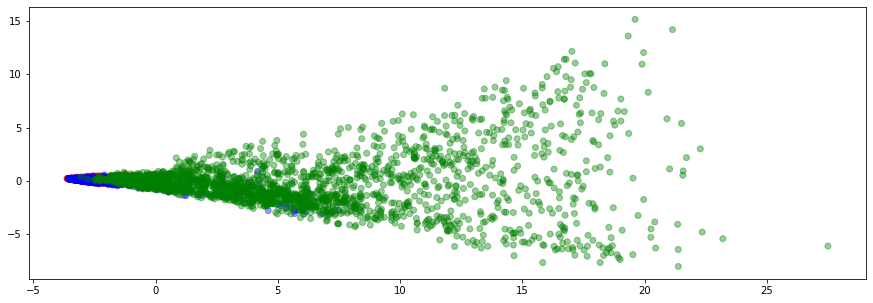

In [97]:
plt.figure(figsize=(15,5))
plt.scatter(acp_data[:,0],acp_data[:,1],alpha=0.4,c=y)
plt.show()


### Three-dimensional PCA

In [98]:
acp = PCA(n_components=3)

In [99]:
acp_data=acp.fit_transform(dta)

In [100]:
acp_data.shape

(6900, 3)

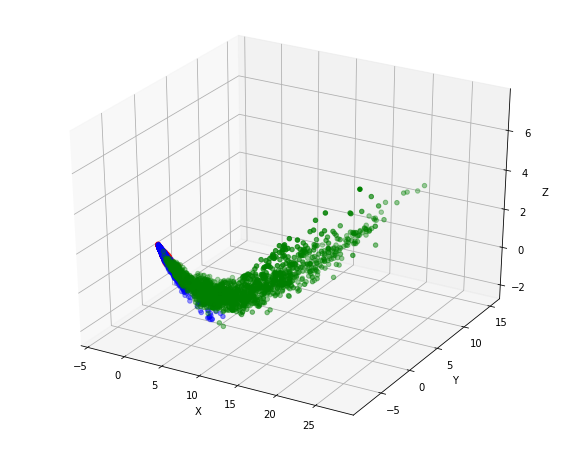

In [101]:
ax = plt.figure(figsize=(10,8)).gca(projection='3d')
ax.scatter(acp_data[:,0], acp_data[:,1], acp_data[:,2],c=y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


### Support vector machine

In [102]:
from sklearn.svm import SVC

#### SVM model with  default hyperparameters

In [103]:
svm=SVC()

In [104]:
svm=svm.fit(X_train,y_train.values.ravel())

In [105]:
print("Accuracy of SVM classifier on training set:",svm.score(X_train,y_train))
print("Accuracy of SVM classifier on testing set:",svm.score(X_test,y_test))

Accuracy of SVM classifier on training set: 0.6996376811594203
Accuracy of SVM classifier on testing set: 0.7


#### SVM model with tuned hyperparameters

defining parameter range

In [106]:
param_grid = {'C': [0.1, 1, 10, 100, 1000,10000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [107]:
grid = GridSearchCV(SVC(), param_grid, refit = True)

fitting the model for grid search

In [108]:
grid.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
print("Best parameters found by GridSeachCV")
print(grid.best_params_)

Best parameters found by GridSeachCV
{'C': 10000, 'gamma': 1, 'kernel': 'rbf'}


In [110]:
svm_model=SVC(kernel='rbf',gamma=1,C=10000)
svm_model=svm_model.fit(X_train,y_train.values.ravel())



In [111]:
print("Accuracy of SVM classifier on training set:",svm_model.score(X_train,y_train))
print("Accuracy of SVM classifier on testing set:",svm_model.score(X_test,y_test))

Accuracy of SVM classifier on training set: 0.8434782608695652
Accuracy of SVM classifier on testing set: 0.7862318840579711


Model evaluation:

In [ ]:
y_pred_svm=svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           C       0.59      0.73      0.65       444
           D       0.63      0.50      0.56       457
           E       0.98      0.96      0.97       479

    accuracy                           0.73      1380
   macro avg       0.73      0.73      0.73      1380
weighted avg       0.74      0.73      0.73      1380



## Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### Decision tree model with  default hyperparameters

In [ ]:
dt = DecisionTreeClassifier(random_state=1)

In [ ]:
dt=dt.fit(X_train, y_train)

In [ ]:
print("Accuracy of decision tree classifier on training set:",dt.score(X_train,y_train))
print("Accuracy of decision tree classifier on testing set:",dt.score(X_test,y_test))

Accuracy of decision tree classifier on training set: 1.0
Accuracy of decision tree classifier on testing set: 0.7333333333333333


#### Decision tree model with tuned hyperparameters

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,31)}

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [ ]:
grid=grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 12}

In [ ]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=12)

In [ ]:
dt_model=dt_model.fit(X_train,y_train)

In [ ]:
print("Accuracy of decision tree classifier on training set:",dt_model.score(X_train,y_train))
print("Accuracy of decision tree classifier on testing set:",dt_model.score(X_test,y_test))

Accuracy of decision tree classifier on training set: 0.8621376811594202
Accuracy of decision tree classifier on testing set: 0.7572463768115942


In [ ]:
y_pred_dt=dt_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           C       0.65      0.68      0.66       444
           D       0.65      0.63      0.64       457
           E       0.97      0.95      0.96       479

    accuracy                           0.76      1380
   macro avg       0.75      0.75      0.75      1380
weighted avg       0.76      0.76      0.76      1380



## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Random forest model with tuned hyperparameters

In [ ]:
rf=RandomForestClassifier()
rf=rf.fit(X_train,y_train.values.ravel())

In [ ]:
print("Accuracy of random forest classifier on training set:",rf.score(X_train,y_train))
print("Accuracy of random forest classifier on testing set:",rf.score(X_test,y_test))

Accuracy of random forest classifier on training set: 1.0
Accuracy of random forest classifier on testing set: 0.7797101449275362


#### Random forest model with tuned hyperparameters

In [ ]:
rfg=RandomForestClassifier()

In [ ]:
param_grid = { 
    'n_estimators': [100,200,300,400,500,600,700,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,15,20],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid=GridSearchCV(estimator=rfg, param_grid=param_grid, cv= 5,n_jobs=-1)

In [ ]:
grid=grid.fit(X_train,y_train.values.ravel())

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
rf_model=RandomForestClassifier(criterion='entropy',max_depth=20,max_features='auto',n_estimators=500)

In [ ]:
rf_model=rf_model.fit(X_train,y_train.values.ravel())

In [ ]:
print("Accuracy of random forest classifier on training set:",rf_model.score(X_train,y_train))
print("Accuracy of random forest classifier on testing set:",rf_model.score(X_test,y_test))

Accuracy of random forest classifier on training set: 0.9989130434782608
Accuracy of random forest classifier on testing set: 0.7905797101449276


## Artificial neural network (ANN)

In [12]:

import tensorflow as tf
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.utils.vis_utils import plot_model
import pydot
from keras.optimizers import SGD

In [13]:
data=pd.read_csv("bonn_university_data.csv")

In [14]:
data.head()

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,E100
0,00:00:00,12,-56,-37,-31,14,-87,-2,-31,8,...,-129,-26,308,-155,-113,-40,187,-438,-476,23
1,00:00:00.005760,22,-50,-22,-43,26,-89,20,-16,17,...,-309,1,367,-283,-185,-58,44,-561,-518,144
2,00:00:00.011520,35,-64,-17,-39,32,-73,42,10,29,...,-432,29,413,-456,-269,-75,-147,-622,-521,228
3,00:00:00.017280,45,-91,-24,-39,25,-69,48,28,46,...,-412,41,429,-541,-328,-88,-368,-581,-362,260
4,00:00:00.023040,69,-135,-31,-9,16,-51,27,31,50,...,-278,33,400,-474,-312,-89,-550,-460,-68,255


In [15]:
del data['time']

Removing class A and class B records:

In [16]:
compteur=0
for i in data.columns:
    if compteur < 200:
        del data[i]
        compteur+=1

In [17]:
data.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,E100
0,-42,50,-54,9,-76,-148,-27,-64,74,-41,...,-129,-26,308,-155,-113,-40,187,-438,-476,23
1,-39,48,-56,-2,-10,-155,-26,-73,92,-35,...,-309,1,367,-283,-185,-58,44,-561,-518,144
2,-35,45,-57,-9,31,-156,-19,-79,94,-28,...,-432,29,413,-456,-269,-75,-147,-622,-521,228
3,-35,41,-63,-17,44,-156,-13,-78,99,-23,...,-412,41,429,-541,-328,-88,-368,-581,-362,260
4,-36,47,-60,-18,7,-150,-8,-80,91,-20,...,-278,33,400,-474,-312,-89,-550,-460,-68,255


Splitting the signals into several windows:

In [18]:
a=[]
for i in data.columns:
    a.append(np.array_split(data[i],23))
b=[]
for j in range(0,300):
    for k in range(0,23):
        b.append(a[j][k])

        
for i in range(0,len(b)):
    b[i]=b[i].to_numpy()
    
    



Creating the target vector:

In [19]:
target=[]
for i in range(0,2300):
    target.append(0)
for i in range(0,2300):
    target.append(1)
for i in range(0,2300):
    target.append(2)


target=np.array(target)

Convert target  to one hot encoded  for Neural Network:

In [20]:
target= pd.get_dummies(target)

Adjusting window sizes:

In [21]:
for i in range(0,len(b)):
    if b[i].shape[0]!=178:
        b[i]=np.delete(b[i],178)

Separating data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(b,target,test_size=0.2,random_state=0)

Data normalization:

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Initialising the ANN

In [24]:
model = Sequential()

Adding the input layer and the first hidden layer

In [25]:
model.add(Dense(150,input_dim=178,activation='relu'))
model.add(Dropout(0.2))

Adding the second hidden layer

In [26]:
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

Adding the output layer

In [27]:
model.add(Dense(3,activation='softmax'))

Model summary:

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               26850     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 42,253
Trainable params: 42,253
Non-trainable params: 0
_________________________________________________________________


Compiling the ANN:

In [30]:
model.compile(SGD(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

Fitting the ANN to the Training set

In [31]:
model.fit(X_train, y_train,epochs=300)

Epoch 1/300
173/173 [==============================] - 1s 1ms/step - loss: 0.8239 - accuracy: 0.5554
Epoch 2/300
173/173 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.6512
Epoch 3/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.6857
Epoch 4/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7004
Epoch 5/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7008
Epoch 6/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.6894
Epoch 7/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7186
Epoch 8/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7270
Epoch 9/300
173/173 [==============================] - 0s 1ms/step - loss: 0.4901 - accuracy: 0.7337
Epoch 10/300
173/173 [==============================] - 0s 1ms/step - loss: 0.4774 - accura

173/173 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9274
Epoch 82/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9326
Epoch 83/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9233
Epoch 84/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1673 - accuracy: 0.9290
Epoch 85/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1677 - accuracy: 0.9367
Epoch 86/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9289
Epoch 87/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.9304
Epoch 88/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9304
Epoch 89/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9339
Epoch 90/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 

173/173 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.9633
Epoch 161/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.9586
Epoch 162/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9600
Epoch 163/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9583
Epoch 164/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9679
Epoch 165/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9609
Epoch 166/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.9641
Epoch 167/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9582
Epoch 168/300
173/173 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.9643
Epoch 169/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0958 - a

173/173 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9762
Epoch 240/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9715
Epoch 241/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9780
Epoch 242/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9744
Epoch 243/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9748
Epoch 244/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9730
Epoch 245/300
173/173 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9699
Epoch 246/300
173/173 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9742
Epoch 247/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9742
Epoch 248/300
173/173 [==============================] - 0s 1ms/step - loss: 0.0770 - a

Model evaluation:

In [32]:
print("Accuracy of the ANN on train set:",model.evaluate(X_train,y_train)[1])
print("Accuracy of the ANN on test set:",model.evaluate(X_test,y_test)[1])

173/173 [==============================] - 0s 997us/step - loss: 0.0132 - accuracy: 0.9987
Accuracy of the ANN on train set: 0.9987319111824036
44/44 [==============================] - 0s 974us/step - loss: 1.0217 - accuracy: 0.7899
Accuracy of the ANN on test set: 0.7898550629615784


## Models evaluation

In [5]:
models = ['KNN', 'SVM', 'Decision Tree', 'Random Forest','ANN']
accuracy = [0.75, 0.78, 0.75, 0.79,0.78]


In [6]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

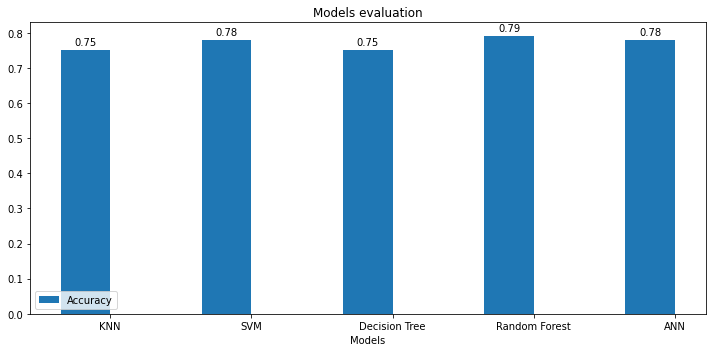

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
#rects2 = ax.bar(x + width/2, f1score, width, label='F1-score')
ax.set_xlabel('Models')
ax.set_title('Models evaluation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.legend(loc='lower left')

fig.tight_layout()

plt.show()